### Demand generation
Decide whether demand is given or randomly generated

In [ ]:
# Option 1 : given demand
demand = [217, 305, 42, 231, 263, 75]
numPeriods = len(demand)

In [1]:
# Option 2 : randomly generated
import random
random.seed('0123456')
maxDemand = 500
numPeriods = 6

demand = [int(maxDemand*random.random()) for t in range(numPeriods)]
print(demand)

[102, 74, 375, 427, 240, 371]


### Inventory Policy
Decide on the inventory policy

In [2]:
policy = "s,Q"

In [ ]:
policy = "R,S"

In [ ]:
policy = "s,S"

### Parameters

In [3]:
inventory = 250  # initial inventory at simulation start
L = 2

# parameters for policies (R,S), (s,Q), or (s,S)
R = 2  # periodic ordering
S = 750  # order-up-to level
s = 320  # reorder point
Q = 550  # lot size

### Calculation

In [4]:
import pandas as pd

II = []  # initial inventory
IP = []  # inventory position
OQ = []  # order quantity
IA = []  # inventory after delivery
FI = []  # final inventory
AI = []  # average inventory
FD = []  # fulfilled demand
SO = []  # stockout (binary)

for t in range(numPeriods):
    II.append(inventory if t == 0 else FI[t-1])
    
    ip = II[t]
    for l in range(1, L+1):
        ip += 0 if t-l < 0 else OQ[t-l]
    IP.append(ip)
    
    oq_dict = {
        "s,Q": Q if ip <= s else 0,
        "R,S": max(S - ip, 0) if (t % R == 0) else 0,
        "s,S": max(S - ip, 0) if ip <= s else 0
    }
    OQ.append(oq_dict.get(policy))
    
    IA.append(II[t] + (0 if t-L < 0 else OQ[t-L]))
    FI.append(IA[t] - demand[t])
    AI.append(0.5*(IA[t]+FI[t]) if FI[t] >= 0 else (IA[t]*IA[t]/(2*demand[t]) if IA[t] >= 0 else 0))
    FD.append(max(min(IA[t], demand[t]), 0))
    SO.append(1 if FI[t] < 0 else 0)

print("Policy: " + policy)

pd.DataFrame(
    [[II[i], IP[i], OQ[i], IA[i], demand[i], FI[i], round(AI[i],2), FD[i], SO[i]] for i in range(numPeriods)], 
    columns=["Initial Inventory", "Inventory Position", "Order Quantity", "Inventory after Delivery", "Demand", "Final Inventory", "Average Inventory", "Fulfilled Demand", "Stockout"])

Policy: s,Q


,Initial Inventory,Inventory Position,Order Quantity,Inventory after Delivery,Demand,Final Inventory,Average Inventory,Fulfilled Demand,Stockout
0,250,250,550,250,102,148,199.00,102,0
1,148,698,0,148,74,74,111.00,74,0
2,74,624,0,624,375,249,436.50,375,0
3,249,249,550,249,427,-178,72.60,249,1
4,-178,372,0,-178,240,-418,0.00,0,1
5,-418,132,550,132,371,-239,23.48,132,1


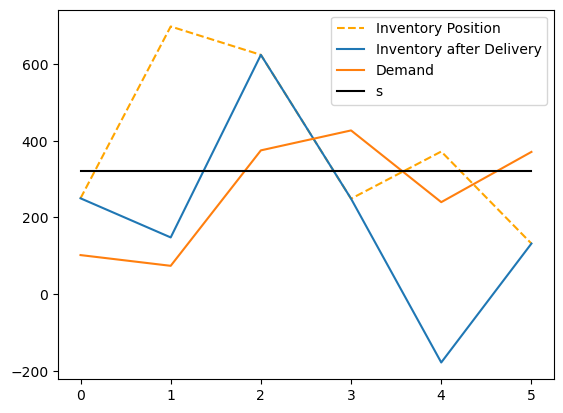

In [5]:
from matplotlib import pyplot as plt, cm

plt.plot(range(numPeriods), IP, label='Inventory Position', linestyle='dashed', color='orange')
plt.plot(range(numPeriods), IA, label='Inventory after Delivery')
plt.plot(range(numPeriods), demand, label='Demand')
if policy == "s,Q" or policy == "s,S":
    plt.plot(range(numPeriods), [s for t in range(numPeriods)], label='s', color='black')
plt.legend()
plt.show()

In [6]:
alpha = 1 - sum(SO)/numPeriods
beta = sum(FD)/sum(demand)
print("alpha = " + str(round(alpha, 4)))
print("beta = " + str(round(beta, 4)))

alpha = 0.5
beta = 0.5865
